# Training a decision tree model based on the million song dataSet

### import necassery elements 

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

import warnings

### load the songs onto a dataframe

In [3]:
df_songs = pd.read_csv('../data/million_song_Dataset/cleaned_msd_genre_dataSet.csv', sep = ',')
df_songs.drop('Unnamed: 0',inplace = True, axis=1) #dont know why this columns is here 
min_samples = df_songs['genre'].value_counts().min()

# Create a balanced dataset by sampling from each genre
df_songs = df_songs.groupby('genre').apply(lambda x: x.sample(min_samples, random_state=45)).reset_index(drop=True)
df_songs.head()
# Display the distribution of genres in the balanced dataset


/var/folders/0j/6cz1795512zg1r1xwfzvsn340000gn/T/ipykernel_87874/2975819657.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_songs = df_songs.groupby('genre').apply(lambda x: x.sample(min_samples, random_state=45)).reset_index(drop=True)


,genre,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,...,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
0,0,0.459688,-0.405883,4,4,1,0.224187,43.491322,37.106948,-8.591724,...,2465.702740,1291.680824,715.550732,965.797416,1206.355757,604.960444,570.810178,311.374355,209.279582,275.704864
1,0,-0.472560,1.572302,4,1,0,0.209755,39.573853,-30.544295,-45.813224,...,1371.892919,885.786821,1432.654692,537.269885,619.761794,468.258536,354.644923,361.722394,177.730135,572.843788
2,0,0.025619,0.080298,4,9,1,0.523075,40.577906,36.128845,18.347096,...,1373.622649,1563.021187,689.452806,1144.243877,528.342466,361.309267,476.897595,290.850659,336.839243,237.536291
3,0,-0.641559,1.210200,4,2,1,-0.124063,35.809098,-15.839804,-4.544371,...,2364.267787,1590.927518,878.274829,1008.977714,793.051600,440.571457,333.074807,303.381634,312.589417,234.498184
4,0,0.555209,0.154528,4,9,1,-0.161293,46.847643,50.732683,3.214353,...,1247.878940,627.571057,779.452576,350.766326,369.294444,253.467573,320.643793,149.073825,163.182180,185.602054


### Pairplot

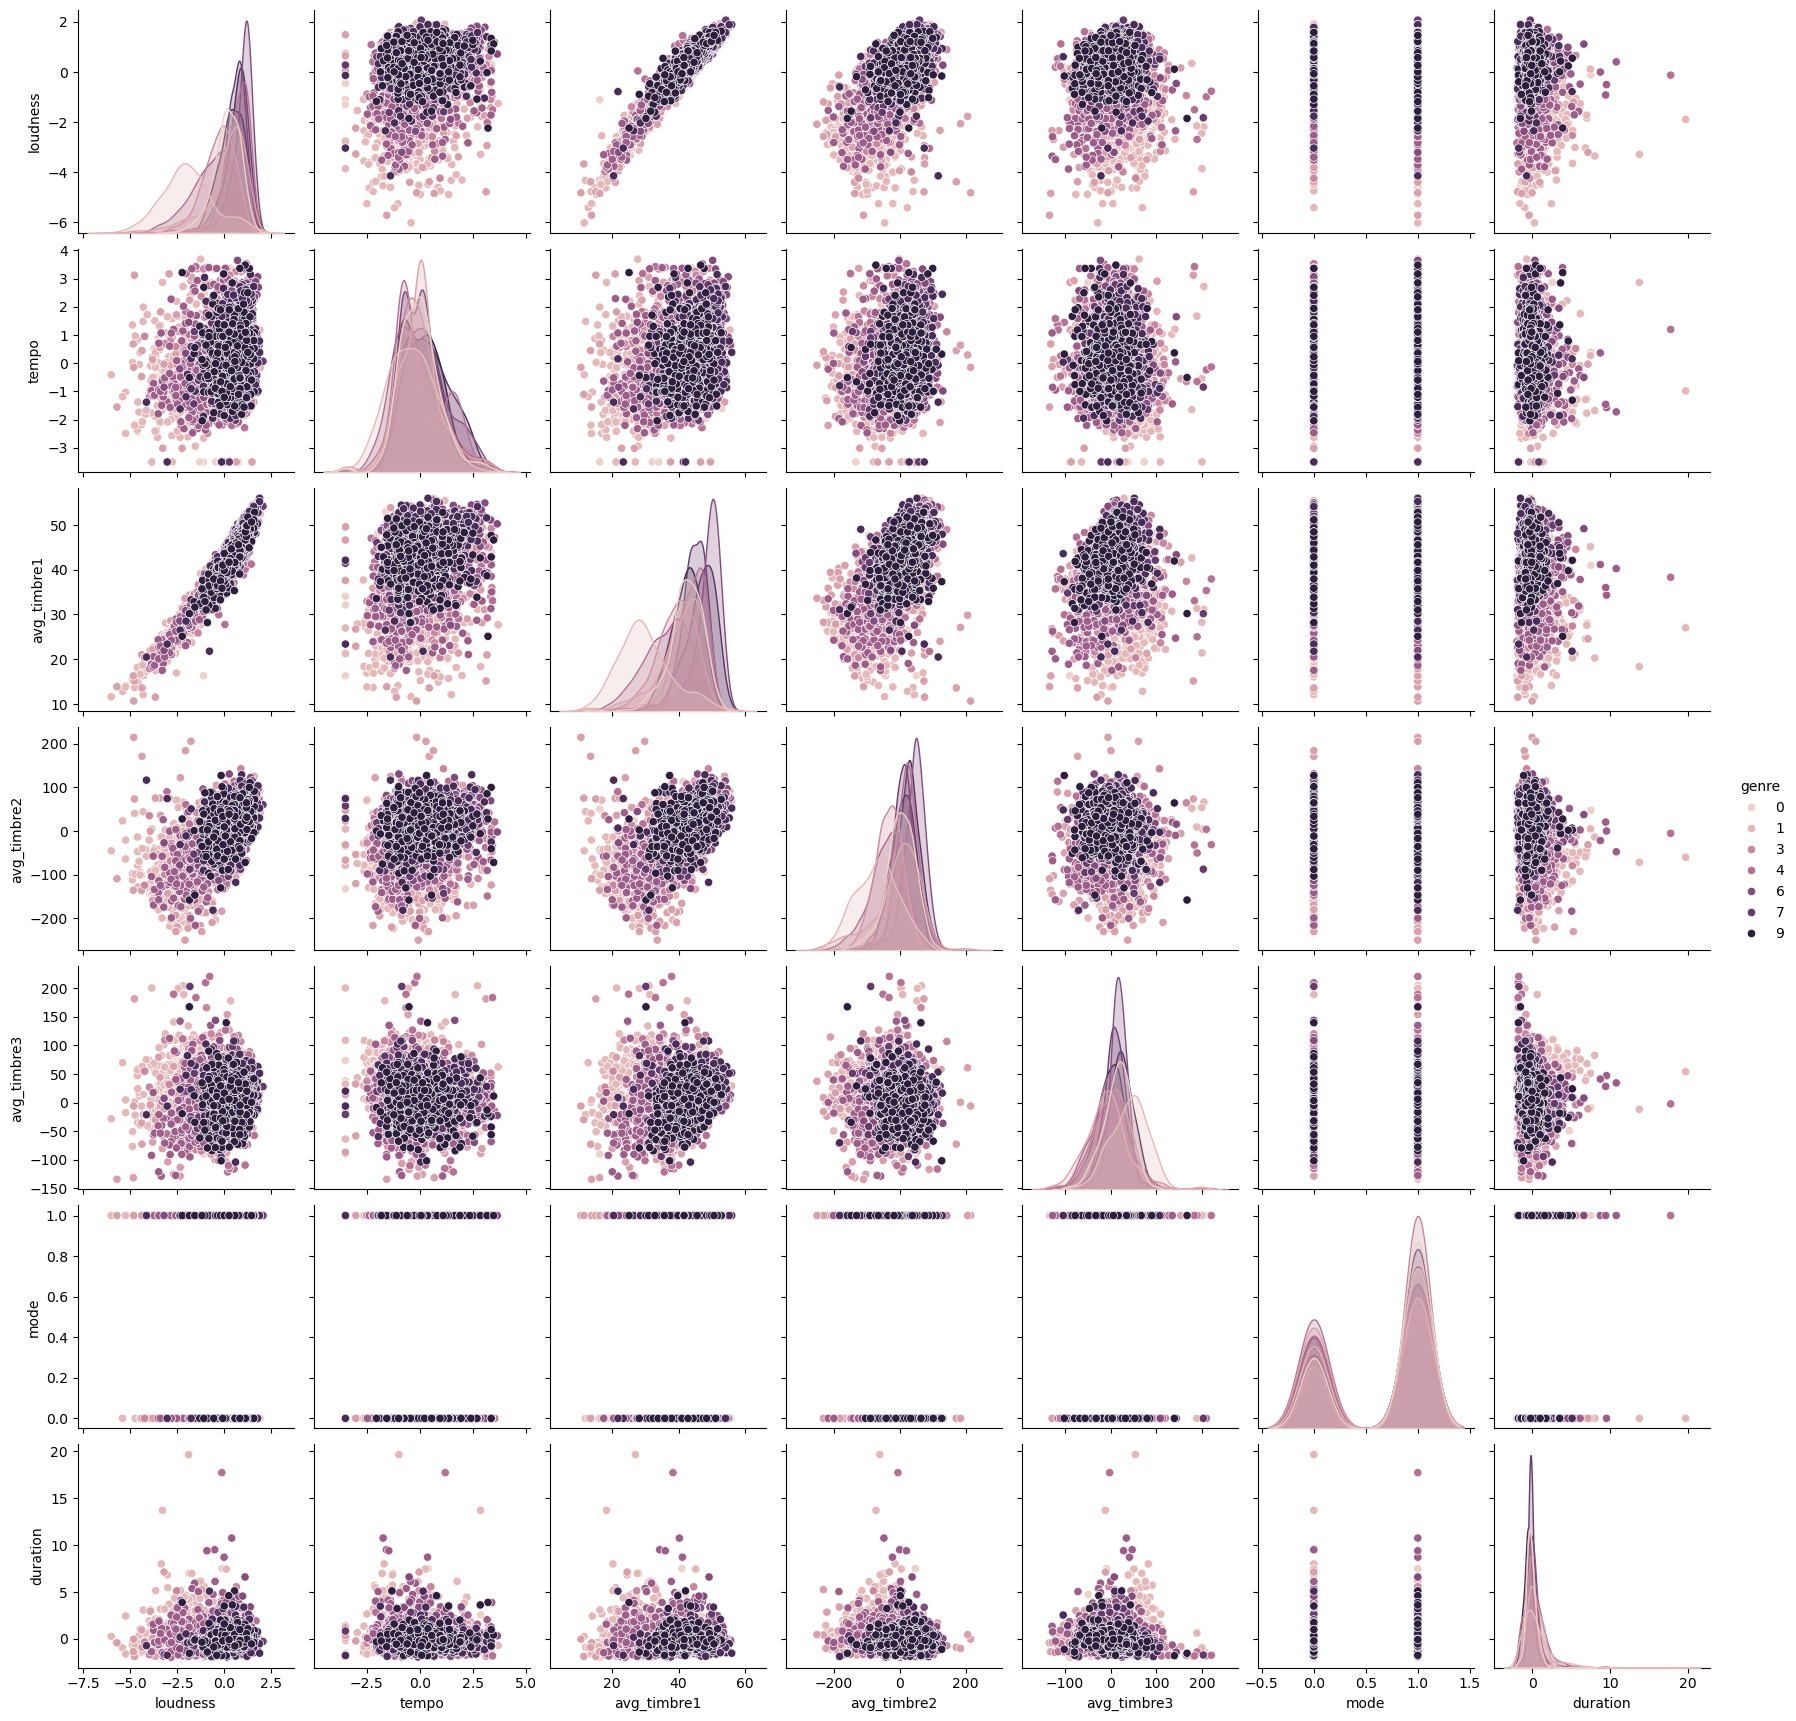

In [4]:
sns.pairplot(df_songs[['loudness', 'tempo', 'avg_timbre1', 'avg_timbre2','avg_timbre3','mode','duration','genre']],hue='genre')

### create select features

In [18]:
X = df_songs.drop('genre',axis=1)
y = df_songs['genre']

### split into test and train groups and initialize the decision tree model

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
smote = SMOTE(random_state=45)
X_train, y_train = smote.fit_resample(X_train, y_train)
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
decision_tree = grid_search.best_estimator_
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10)

In [20]:
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [21]:
# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
#could not get the scores out of the low 40s 

Accuracy: 0.4078
Precision: 0.4225
Recall: 0.4078
F1 Score: 0.4100


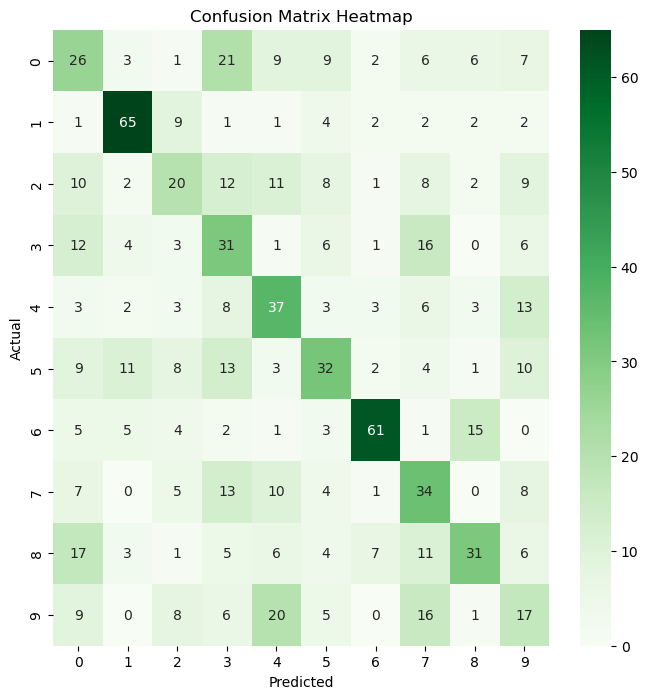

In [22]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
ax = sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show() 

# conclusion
### do not use decision tree for our project 